# HOSPITAL RATING CLASSIFICATION

Welcome to the Starter Code for the Hospital Rating Classification Capstone Project!

In this notebook you'll find 
- A blueprint on how to attempt the course project.
- Additional hints and directions on different tasks

Please note that this approach is one of the many approaches you can take for solving this Capstone project.

### Import the necessary libraries

In [1]:
import pandas as pd, numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
from pandas.core.common import random_state

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.linear_model import Lasso, LassoCV, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Task 1 

Task 1: Understand the data

 

Take some time to familiarize yourself with the data. What are the key variables?

Specifically, answer the following questions:

- 1.1 - Perform a few basic data quality checks to understand the different columns and prepare descriptive statistics for some of the important columns.
- 1.2 - What is the distribution of hospital overall ratings? How are they varying across other parameters like `State`? Create  a few visualizations that provide some insights into the data.

##### Task 1.1

In [3]:
df =  pd.read_csv(r"C:\Users\msian\Downloads\hospital-info.csv")
df.head()

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Ownership,Emergency Services,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,HOUSTON,3347938701,Government,Yes,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Government,Yes,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,LAUDERDALE,2567688400,Government,Yes,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,10007,MIZELL MEMORIAL HOSPITAL,702 N MAIN ST,OPP,AL,36467,COVINGTON,3344933541,Voluntary,Yes,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,10008,CRENSHAW COMMUNITY HOSPITAL,101 HOSPITAL CIRCLE,LUVERNE,AL,36049,CRENSHAW,3343353374,Others,Yes,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [4]:
##Check the data type of the different columns
## Hint - You can use the .info() method here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Provider ID                                           3057 non-null   int64  
 1   Hospital Name                                         3057 non-null   object 
 2   Address                                               3057 non-null   object 
 3   City                                                  3057 non-null   object 
 4   State                                                 3057 non-null   object 
 5   ZIP Code                                              3057 non-null   int64  
 6   County Name                                           3057 non-null   object 
 7   Phone Number                                          3057 non-null   int64  
 8   Hospital Ownership                                    3057

Note down your observations after completing the above task. You should ask questions such as:

- Check for non-null columns. Do you see any column having missing values?
- Are the datatypes correct for all the variables? You might have to convert a few of them to categorical later

##### Task 1.2

In [5]:
## Descriptive Statistics
## Let's take the main measures and the hospital overall rating first.
features = ['Mortality national comparison', 'Safety of care national comparison',
            'Readmission national comparison', 'Patient experience national comparison',
            'Effectiveness of care national comparison', 'Timeliness of care national comparison',
            'Efficient use of medical imaging national comparison']

In [6]:
### Filter out the above columns from the DataFrame and compute the descriptive statistics
### Hint - The .describe() method might be useful
df[features].describe()


,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison
count,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000,3057.000000
mean,1.018973,1.042852,0.981681,0.937848,1.192673,0.976447,1.006215
std,0.492383,0.693884,0.731887,0.799253,0.647062,0.750720,0.478217
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


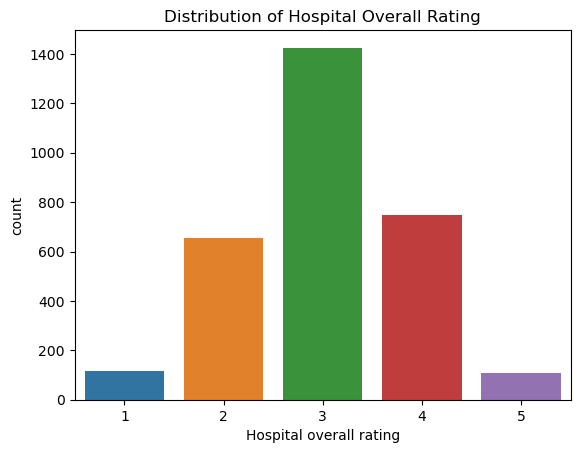

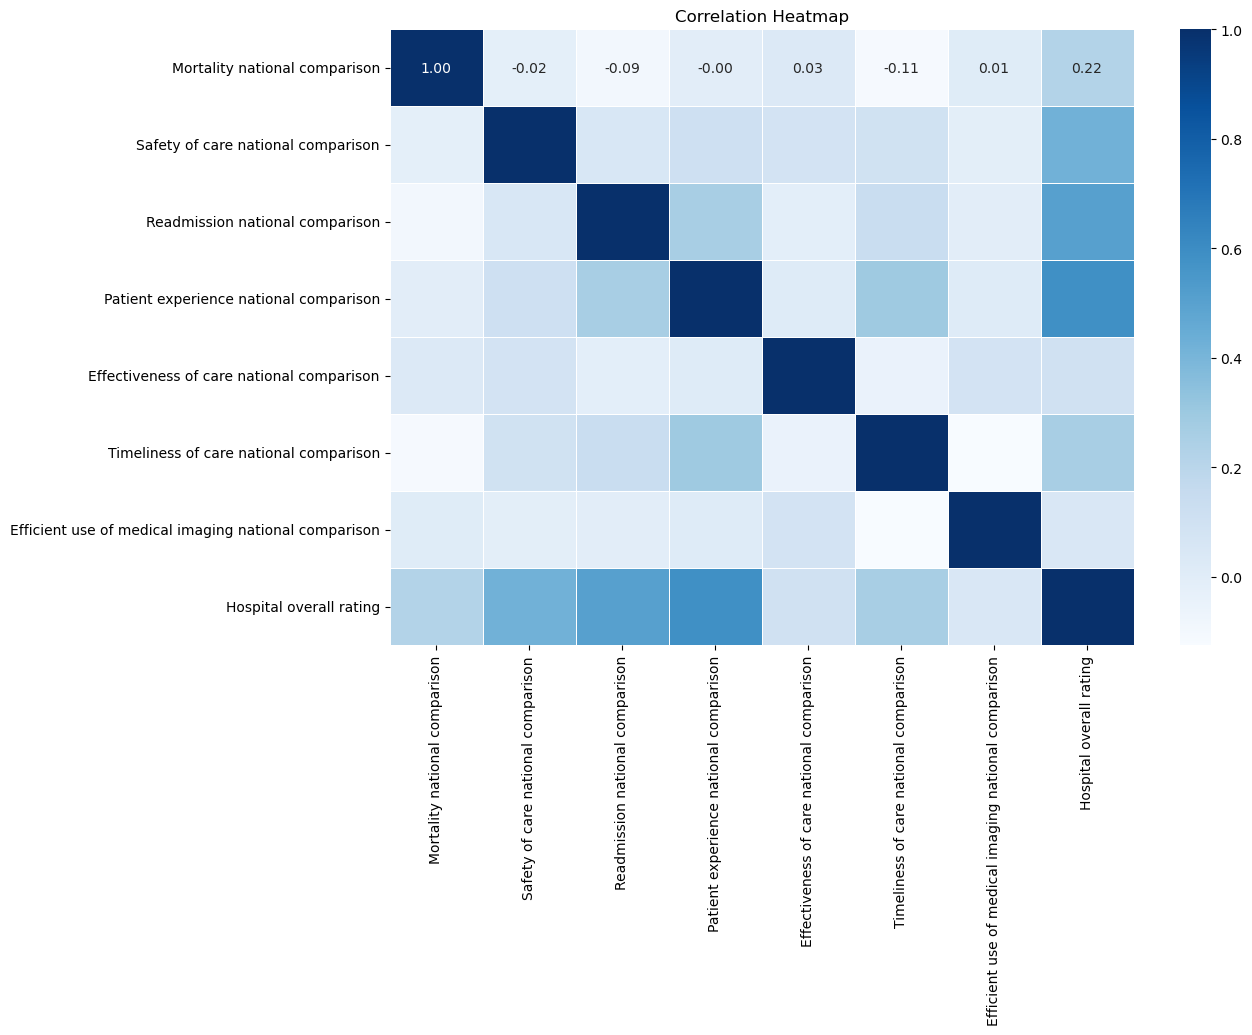

Correlation with Hospital Overall Rating:
 Efficient use of medical imaging national comparison    0.046826
Effectiveness of care national comparison               0.101060
Mortality national comparison                           0.222774
Timeliness of care national comparison                  0.263083
Safety of care national comparison                      0.421701
Readmission national comparison                         0.503575
Patient experience national comparison                  0.586112
Hospital overall rating                                 1.000000
Name: Hospital overall rating, dtype: float64


In [7]:
### Analyze your target variable - "Hospital overall rating"
### How does the ratings distribution look like for all the hospitals?

## Hint - You can use seaborn plots like countplot() for checking distribution of the ratings
## Hint - You can plot a correlation heatmap to check the correlation between the main measures stored in "features"
## Hint - You can also check the correlations between the "Hospital overall rating" and other measures

df['Hospital overall rating'] = pd.to_numeric(df['Hospital overall rating'], errors='coerce')

# Visualize the distribution of Hospital overall rating
sns.countplot(x='Hospital overall rating', data=df)
plt.title('Distribution of Hospital Overall Rating')
plt.show()

# Check correlation heatmap between main measures
plt.figure(figsize=(12, 8))
correlation_matrix = df[features + ['Hospital overall rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=.5, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Check correlations between Hospital overall rating and other measures
correlation_with_target = df[features + ['Hospital overall rating']].corr()['Hospital overall rating'].sort_values(ascending=True)
print("Correlation with Hospital Overall Rating:\n", correlation_with_target)

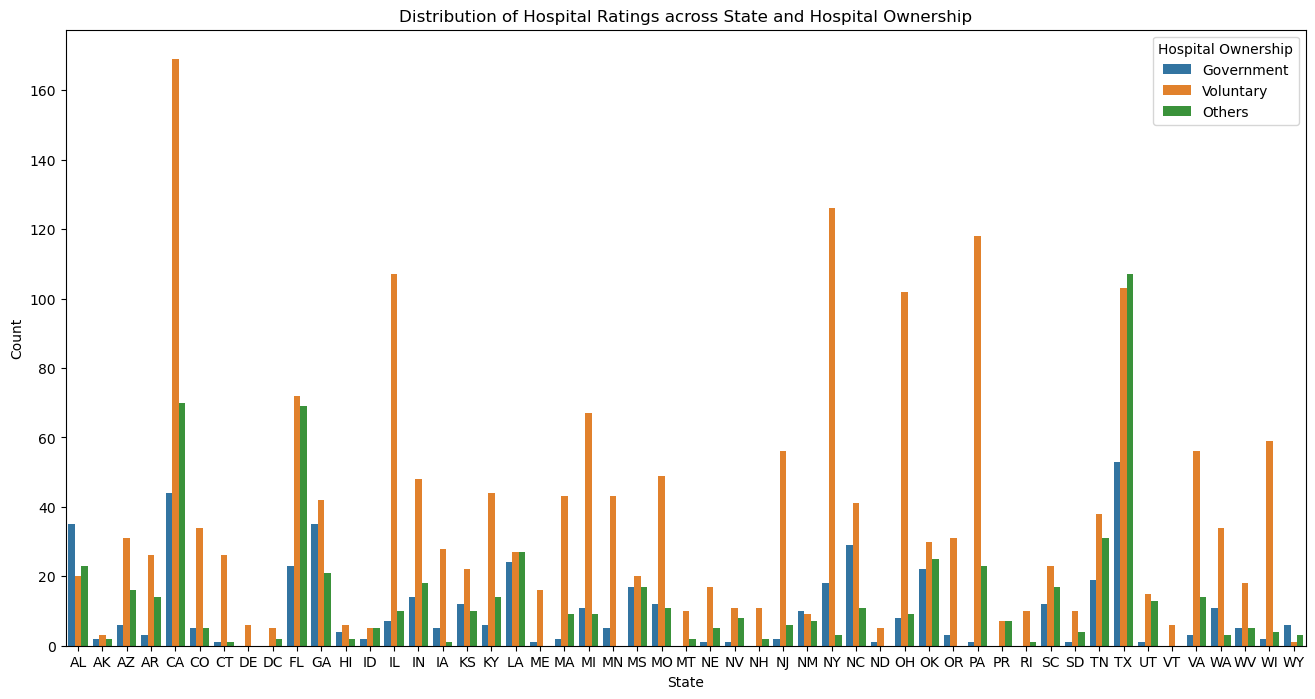

,Hospital overall rating
State,
AK,2.857143
AL,3.038462
AR,2.697674
AZ,3.000000
CA,2.883392
CO,3.500000
CT,2.678571
DC,1.428571
DE,3.666667


In [8]:
### Check how the hospital ratings vary across other parameters
### Hint - Some example parameters are "State" and "Hospital Ownership"
### Hint - You can use the pivot_table functionality of pandas to perform this


# Creating a countplot to visualize the distribution of hospital ratings across State and Hospital Ownership
plt.figure(figsize=(16, 8))
sns.countplot(x='State', hue='Hospital Ownership', data=df)
plt.title('Distribution of Hospital Ratings across State and Hospital Ownership')
plt.xlabel('State')
plt.ylabel('Count')
plt.legend(title='Hospital Ownership', loc='upper right')
plt.show()
df.pivot_table(values='Hospital overall rating', index='State', aggfunc='mean')

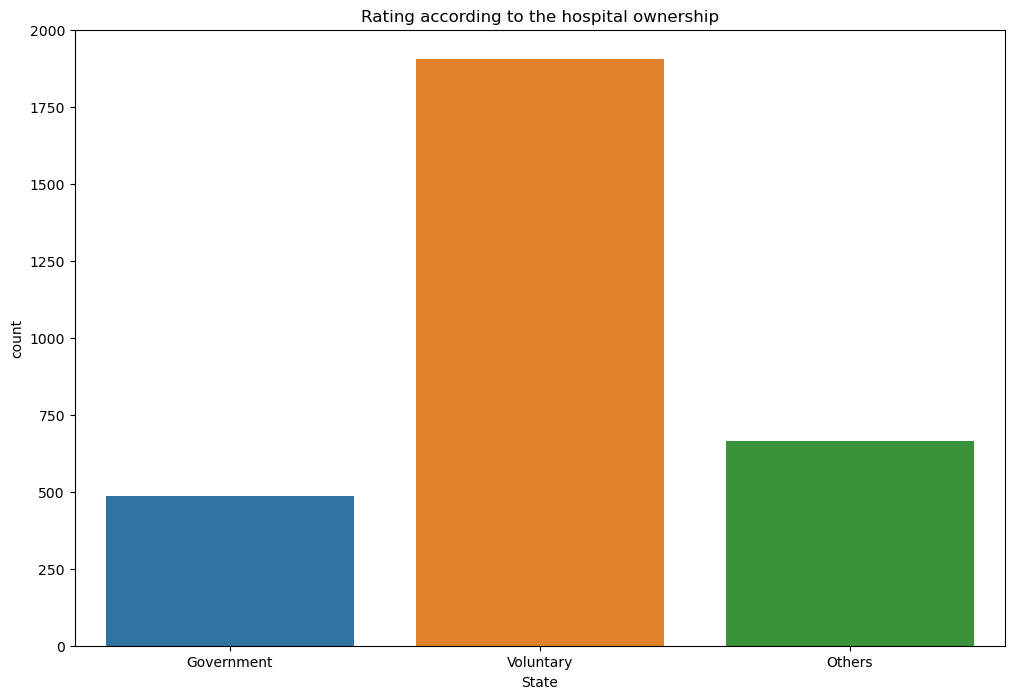

In [9]:
plt.figure(figsize=(12,8))
sns.countplot(data=df , x = 'Hospital Ownership')
plt.title("Rating according to the hospital ownership")
plt.xlabel('State')
plt.show()

In [10]:
df.pivot_table(index='State' , columns='Hospital Ownership',aggfunc='size')

Hospital Ownership,Government,Others,Voluntary
State,,,
AK,2.0,2.0,3.0
AL,35.0,23.0,20.0
AR,3.0,14.0,26.0
AZ,6.0,16.0,31.0
CA,44.0,70.0,169.0
CO,5.0,5.0,34.0
CT,1.0,1.0,26.0
DC,NaN,2.0,5.0
DE,NaN,NaN,6.0


Note down your observations after completing the above task. You should ask questions such as:

# How are ratings distributed? the Are you seeing any peculiar distributions for the ratings? 



The ratings distribution is visualized in the count plot above, which counts each hospital overall rating (1 to 5) within different categories of hospital ownership (Government, Others, and Voluntary).

# How do the correlations between the measures and the target variable look like?

Each cell in the heatmap represents the correlation coefficient between the corresponding pair of variables. Positive values indicate a positive correlation, while negative values indicate a negative correlation. 

# How do ratings vary across the different levels of the parameter that you have taken?

The countplot chart above shows the distribution of hospital ratings at different levels of the "Hospital Ownership" parameter. It shows how many hospitals with each type of ownership fall into each rating category.

### Task 2 - Building machine learning models

Use your knowledge of classification models to create three models that predict hospital ratings. You should follow these steps:

- Prepare the data for the machine learning model 
   - Remove all the demographic columns as well as any other uneccessary features from the data set
   - For simplification, instead of having 5 ratings, we will convert them to 0 and 1. Here 0 indicates that the hospital has been rated 3 or below and 1 indicates that the hospital has been rated as 4 or 5.  Encode the Hospital columns as follows
            1,2,3 : 0
            4,5: 1
   - Store the predictors and the target variable in variables X and y.
   - Create the dummy variables for categorical columns.
   - Split the data into train and test sets (70-30 split with random state 0. This random state is recommended, though you can use any other random state of your choice).
   - Scale the numerical columns using StandardScaler.
- Build 3 classification models on your dataset. Carefully apply regularization and hyperparameter tuning techniques to improve your model performance for each of the models.
- Summarize the classification performance in terms of the necessary metrics such as accuracy, sensitivity, specificity, etc.

#####  Prepare the data for machine learning model

In [11]:
## Drop all the demographic features
demo_features = ['Provider ID','Hospital Name','Address','City','State','ZIP Code','County Name','Phone Number']

In [12]:
## Drop all the above features from the DataFrame df and store the rest of the features in df2
df2 = df.drop(columns=demo_features)

In [13]:
### Check the first 5 rows of df2 to see if the drop operation has worked correctly or not
df2.head(5)

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


In [14]:
##Recheck the columns to see if anything else needs to be dropped
## There might be other unnecessary columns that require dropping

# Drop the 'rating_group' column
df2.drop(columns=['rating_group'], inplace=True)
df2

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,3,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.400000,-0.900000,-7.100000,-2.400000,-38.100000,-6.900000
1,Government,Yes,3,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.300000,-10.200000,-5.300000,-4.000000,-42.800000,-5.100000
2,Government,Yes,2,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.800000,-4.600000,-0.000000,-4.600000,-45.600000,-9.100000
3,Voluntary,Yes,3,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.300000,-6.100000,-4.716942,-2.964405,-39.964766,-20.700000
4,Others,Yes,3,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.600000,-2.936245,-4.716942,-0.600000,-39.964766,-8.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,Voluntary,Yes,4,1,1,1,1,2,1,1,...,-2.97300,-0.871177,-0.987212,-1.557,-0.600000,-2.936245,-4.716942,-7.200000,-39.964766,-10.800000
3053,Voluntary,Yes,3,1,1,1,2,1,2,1,...,-0.96900,-0.871177,-0.987212,-0.506,-6.100000,-0.000000,-3.300000,-2.964405,-35.600000,-6.200000
3054,Others,Yes,3,1,1,1,0,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.399,-10.700000,-4.600000,-4.716942,-2.964405,-39.964766,-9.144957
3055,Others,Yes,3,1,1,2,0,0,1,1,...,-0.96398,-0.871177,-0.987212,-0.243,-8.692897,-2.936245,-4.716942,-2.964405,-39.964766,-9.144957


##### Map the ratings 

- 1,2,3 will be 0
- 4,5 will be 1

In [15]:
## Hint -  Write a simple lambda function to do the mapping
## Refer to this link from Course 1 for more help -  https://learn.upgrad.com/course/2897/segment/16179/128948/394776/2054363
map_rating = lambda x: 0 if x in [1 ,2, 3] else 1

# Apply the lambda function to the 'ratings' column
df2['Hospital overall rating'] = df2['Hospital overall rating'].map(map_rating)
df2.head(5)

,Hospital Ownership,Emergency Services,Hospital overall rating,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,Government,Yes,0,1,2,1,0,1,1,1,...,-1.87000,-0.000000,-0.422000,-0.787,-6.4,-0.900000,-7.100000,-2.400000,-38.100000,-6.9
1,Government,Yes,0,0,1,2,1,1,2,0,...,-0.38600,-0.871177,-1.388000,-0.405,-13.3,-10.200000,-5.300000,-4.000000,-42.800000,-5.1
2,Government,Yes,0,0,1,1,0,1,2,1,...,-0.31000,-0.871177,-1.261000,-0.513,-11.8,-4.600000,-0.000000,-4.600000,-45.600000,-9.1
3,Voluntary,Yes,0,1,1,0,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.000,-24.3,-6.100000,-4.716942,-2.964405,-39.964766,-20.7
4,Others,Yes,0,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,-0.585,-3.6,-2.936245,-4.716942,-0.600000,-39.964766,-8.2


##### Convert the datatypes of the categorical variables

In [16]:
### In task 1, you would have identified the categorical variables, which may or may not be in their correct data types
### Now is the right time to convert them to the correct datatype 
### This will be useful when you create dummy variables next
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = pd.Categorical(df[column])

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 94 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Provider ID                                           3057 non-null   int64   
 1   Hospital Name                                         3057 non-null   category
 2   Address                                               3057 non-null   category
 3   City                                                  3057 non-null   category
 4   State                                                 3057 non-null   category
 5   ZIP Code                                              3057 non-null   int64   
 6   County Name                                           3057 non-null   category
 7   Phone Number                                          3057 non-null   int64   
 8   Hospital Ownership                              

In [18]:
for column in df2.columns:
    if df2[column].dtype == 'object':
        df2[column] = pd.Categorical(df2[column])

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3057 entries, 0 to 3056
Data columns (total 85 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Hospital Ownership                                    3057 non-null   category
 1   Emergency Services                                    3057 non-null   category
 2   Hospital overall rating                               3057 non-null   int64   
 3   Mortality national comparison                         3057 non-null   int64   
 4   Safety of care national comparison                    3057 non-null   int64   
 5   Readmission national comparison                       3057 non-null   int64   
 6   Patient experience national comparison                3057 non-null   int64   
 7   Effectiveness of care national comparison             3057 non-null   int64   
 8   Timeliness of care national comparison          

##### Data Preparation and Train-test split

In [20]:
### Create X and y variable
X = df2.drop(columns=['Hospital overall rating']) 
y = df2['Hospital overall rating']

In [21]:
### Create the dummy variables for categorical variables
X = pd.get_dummies(X , drop_first= True)

In [22]:
## Perform the train_test split to create the train and validation sets
## Choose any random state of your choice 
## Split it in the ratio of 70-30
X_train , X_val , y_train , y_val = train_test_split(X, y ,  random_state= 0 , test_size= 0.3) 
X_train.head()


,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,MORT_30_AMI_Score,MORT_30_CABG_Score,MORT_30_COPD_Score,...,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score,Hospital Ownership_Others,Hospital Ownership_Voluntary,Emergency Services_Yes
2001,1,2,2,1,1,2,1,-14.500000,-3.331371,-8.6,...,-0.000,-13.0,-4.1,-4.716942,-2.964405,-39.964766,-4.400000,0,1,1
2336,1,0,0,1,2,0,1,-13.100000,-3.000000,-9.2,...,-0.625,-9.5,-0.0,-4.500000,-1.300000,-25.000000,-7.800000,0,1,1
1242,1,1,1,0,1,1,1,-14.400000,-3.331371,-8.4,...,-1.632,-13.3,-0.0,-3.500000,-1.300000,-39.964766,-8.400000,0,1,1
1491,1,1,1,1,1,2,1,-14.054091,-3.331371,-7.5,...,-0.865,-6.8,-11.8,-4.716942,-2.964405,-39.964766,-2.300000,0,1,1
1651,1,1,1,2,1,1,1,-15.900000,-3.331371,-7.9,...,-1.188,-2.6,-0.0,-4.300000,-1.800000,-35.400000,-9.144957,0,1,1


In [23]:
# Scale and Standardize the numerical variables
scaler = StandardScaler()
num_cols = [col for col in X.columns if X[col].dtypes != 'category']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_val[num_cols] = scaler.transform(X_val[num_cols])

#####  Model building and evaluation

You have learned multiple classification models till now, such as logistic regression, k-NN and decision trees. You should choose 3 of the models for performing the tasks in this section. You can follow the below steps:


- Build the models and fit it on training data
- Perform classifications on the validation data
- Compute and tabulate the validation accuracies for the different models
- Compare the accuracies for the different models and choose the best model

**Note** - You can also evaluate your models using additional metrics like `F1 score`, `Sensitivity`,`Specificity` , etc.


**Helpful Resource** - For writing precise code for this section, you can refer to the code you learned in Model Selection Lab Session in the `kNN and Model Selection` module.




In [24]:
# Build and fit logistic regression model
logistic_model = LogisticRegression(random_state=0)
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
# Build and fit k-NN model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
# Build and fit decision tree model
tree_model = DecisionTreeClassifier(random_state=0)
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [27]:
#Perform classifications on the validation data
y_val_pred_logistic = logistic_model.predict(X_val)
y_val_pred_knn = knn_model.predict(X_val)
y_val_pred_tree = tree_model.predict(X_val)

In [28]:
acc_logistic = accuracy_score(y_val, y_val_pred_logistic)
acc_knn = accuracy_score(y_val, y_val_pred_knn)
acc_tree = accuracy_score(y_val, y_val_pred_tree)
print(f' the accuracy of logistic regression is : {acc_logistic}')
print(f' the accuracy of KNN value is : {acc_knn}')
print(f' the accuracy of Decision Tree is : {acc_tree}')

 the accuracy of logistic regression is : 0.9618736383442266
 the accuracy of KNN value is : 0.8420479302832244
 the accuracy of Decision Tree is : 0.840958605664488


In [29]:
# Calculate accuracies
acc_logistic = accuracy_score(y_val, y_val_pred_logistic)
acc_knn = accuracy_score(y_val, y_val_pred_knn)
acc_tree = accuracy_score(y_val, y_val_pred_tree)

# Tabulate the accuracies
accuracies = pd.DataFrame({
    'Model': ['Logistic Regression', 'k-NN', 'Decision Tree'],
    'Accuracy': [acc_logistic, acc_knn, acc_tree]
})

# Display the accuracies
print(accuracies)

# Choose the model with the highest accuracy
best_model = accuracies.loc[accuracies['Accuracy'].idxmax(), 'Model']

print(f"The best model is: {best_model} with an accuracy of {accuracies['Accuracy'].max()}")


                 Model  Accuracy
0  Logistic Regression  0.961874
1                 k-NN  0.842048
2        Decision Tree  0.840959
The best model is: Logistic Regression with an accuracy of 0.9618736383442266


In [30]:
from sklearn.metrics import confusion_matrix

def calculate_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Calculate various metrics for each model
metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Sensitivity', 'Specificity'])

for model, y_pred in [('Logistic Regression', y_val_pred_logistic),
                      ('k-NN', y_val_pred_knn),
                      ('Decision Tree', y_val_pred_tree)]:
    accuracy = accuracy_score(y_val, y_pred)
   
    
    f1 = f1_score(y_val, y_pred, average='weighted')
    sensitivity, specificity = calculate_sensitivity_specificity(y_val, y_pred)

    metrics = metrics.append({
        'Model': model,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'Sensitivity': sensitivity,
        'Specificity': specificity
    }, ignore_index=True)

# Display the metrics
metrics


,Model,Accuracy,F1 Score,Sensitivity,Specificity
0,Logistic Regression,0.961874,0.961578,0.908745,0.983206
1,k-NN,0.842048,0.837034,0.634981,0.925191
2,Decision Tree,0.840959,0.840213,0.707224,0.894656


In [31]:
# Identify the best model based on the chosen metric(s)
best_model = metrics.loc[metrics['F1 Score'].idxmax(), 'Model']
print(f"The best model is: {best_model} with an F1 Score of {metrics['F1 Score'].max()}")


The best model is: Logistic Regression with an F1 Score of 0.961577873514578


Confusion Matrix - Logistic Regression:
 [[644  11]
 [ 24 239]]


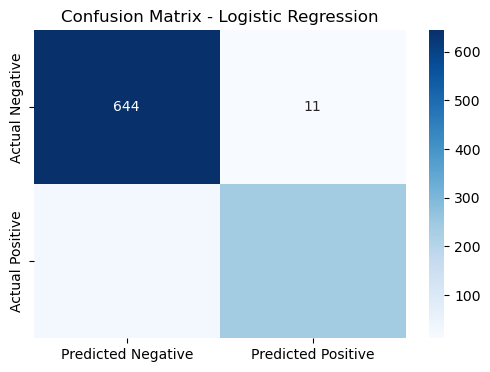

Confusion Matrix - k-NN:
 [[606  49]
 [ 96 167]]


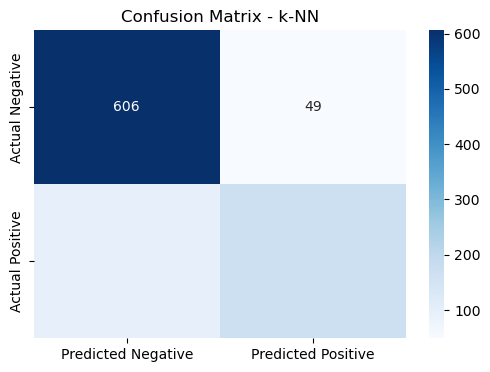

Confusion Matrix - Decision Tree:
 [[586  69]
 [ 77 186]]


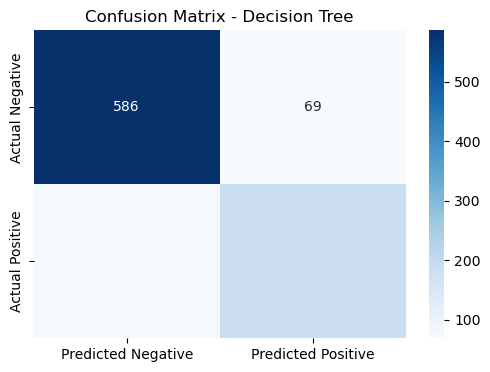

In [32]:
# Plot confusion matrices
for model, y_pred in [('Logistic Regression', y_val_pred_logistic),
                      ('k-NN', y_val_pred_knn),
                      ('Decision Tree', y_val_pred_tree)]:
    confusion_mat = confusion_matrix(y_val, y_pred)
    print(f'Confusion Matrix - {model}:\n', confusion_mat)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(confusion_mat, annot=True, fmt='g', cmap='Blues', 
                xticklabels=['Predicted Negative', 'Predicted Positive'],
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title(f'Confusion Matrix - {model}')
    plt.show()



- Additional notes
  - You can peform additional tasks like building ROC/AUC curves for all the models and identifying an optimal cut-off
  - You can also build conjectures around some arbitrary metric cut-offs. For example, say you want to build a model which has atleast 50% accuracy, specificity and sensitivity. Use these conjectures to arrive at a final model
  - Note that there is no right answer for this particular question. You will be awarded marks as long as your overall approach is correct

In [33]:
val_probabilities_log = logistic_model.predict_proba(X_val)[:, 1]
val_1_spec, val_sens, _ = roc_curve(y_val, val_probabilities_log)


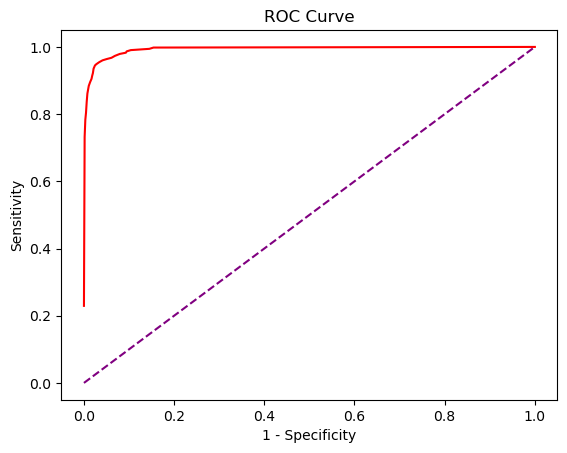

In [34]:
sns.lineplot(x = val_1_spec, y = val_sens, color = 'red', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve');

In [35]:
val_probabilities_KNN = knn_model.predict_proba(X_val)[:, 1]

val_1_spec, val_sens, _ = roc_curve(y_val, val_probabilities_KNN)


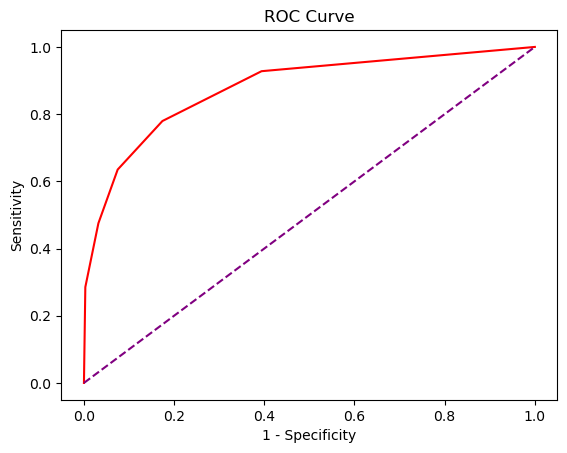

In [36]:
sns.lineplot(x = val_1_spec, y = val_sens, color = 'red', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve');

In [37]:
val_probabilities_Decision = tree_model.predict_proba(X_val)[:,1]
val_1_specificity , val_sensitivity,_ = roc_curve(y_val , val_probabilities_Decision)

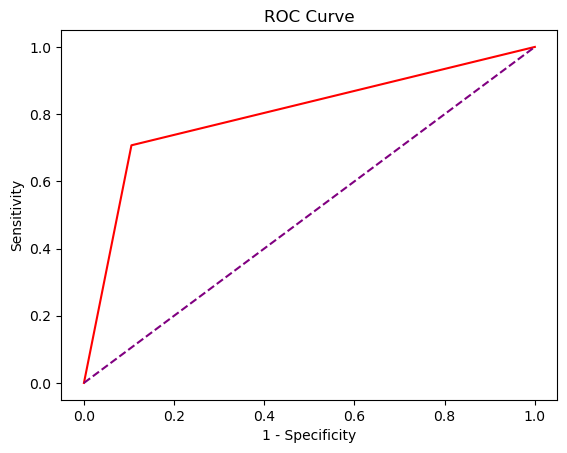

In [38]:
sns.lineplot(x = val_1_specificity, y =val_sensitivity, color = 'red', ci = None)
plt.plot([0,1], [0,1], linestyle = '--', color = 'purple')
plt.xlabel('1 - Specificity')
plt.ylabel('Sensitivity')
plt.title('ROC Curve');

In [39]:
auc_log_reg = roc_auc_score(y_val, val_probabilities_log)
auc_log_reg

0.9940730850724175

In [40]:
auc_KNN = roc_auc_score(y_val, val_probabilities_KNN)
auc_KNN

0.8772559719037528

In [41]:
auc_Decision = roc_auc_score(y_val, val_probabilities_Decision)
auc_Decision

0.8009404115751895

In [42]:

fpr, tpr, thresholds = roc_curve(y_val, val_probabilities_log)

# Calculate sensitivity and specificity 
sensitivity = tpr
specificity = 1 - fpr


cut_off = sensitivity +  specificity - 1

#findind the optimal cut-off
optimal_threshold = thresholds[np.argmax(cut_off)]

print(f'Optimal Cutoff value for logistic regression : {optimal_threshold:.2f}')


Optimal Cutoff value for logistic regression : 0.25


In [43]:
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities_KNN)

# Calculate sensitivity and specificity 
sensitivity = tpr
specificity = 1 - fpr


cut_off = sensitivity +  specificity - 1

#findind the optimal cut-off
optimal_threshold = thresholds[np.argmax(cut_off)]

print(f'Optimal Cutoff value for KNN : {optimal_threshold:.2f}')


Optimal Cutoff value for KNN : 0.40


In [44]:
fpr, tpr, thresholds = roc_curve(y_val, val_probabilities_Decision)

# Calculate sensitivity and specificity 
sensitivity = tpr
specificity = 1 - fpr


cut_off = sensitivity +  specificity - 1

#findind the optimal cut-off
optimal_threshold = thresholds[np.argmax(cut_off)]

print(f'Optimal Cutoff value for Decision Tree : {optimal_threshold:.2f}')

Optimal Cutoff value for Decision Tree : 1.00


### Task 3 

You have now built (at least) three machine learning models. Choose the best model according to your metrics and provide the following recommendations
-  Hospital Rating Predictor: Using the best model of your choice, predict the ratings of a few new hospitals which are yet to be assigned a rating by CMS. The information for these hospitals has been provided in a separate CSV file named 'not_yet_rated.csv'.
- Hospital Improvement Plan: Let's say a few of the hospitals were rated low (0) by the model that you chose. Provide recommendations on how these hospitals can improve their ratings

In [45]:
###Let's read the not_yet_rated dataset
new = pd.read_csv(r"C:\Users\msian\Downloads\not_yet_rated.csv")

In [46]:
## Check the top 5 rows
new.head(5)

,Provider ID,Hospital Ownership,Emergency Services,Mortality national comparison,Safety of care national comparison,Readmission national comparison,Patient experience national comparison,Effectiveness of care national comparison,Timeliness of care national comparison,Efficient use of medical imaging national comparison,...,SAFETY_HAI_3_SIR_Score,SAFETY_HAI_4_SIR_Score,SAFETY_HAI_5_SIR_Score,SAFETY_HAI_6_SIR_Score,MED_OP_10_Score,MED_OP_11_Score,MED_OP_13_Score,MED_OP_14_Score,MED_OP_8_Score,MED_OP_9_Score
0,520139,Voluntary,Yes,1,1,2,2,2,2,1,...,-0.37100,-1.278000,0.000000,-0.56600,-3.100000,-0.500000,-6.100000,-2.900000,-41.000000,-6.100000
1,520189,Government,Yes,2,1,2,2,2,2,1,...,-1.16900,0.000000,-0.987212,-0.83400,-6.700000,-0.300000,-5.400000,-1.900000,-41.100000,-5.300000
2,370029,Government,No,1,1,1,1,1,2,1,...,-0.96398,-0.871177,-0.987212,0.00000,-18.700000,-13.900000,-4.716942,-2.964405,-39.964766,-8.300000
3,370032,Others,Yes,1,2,1,0,1,1,1,...,0.00000,-0.871177,-0.987212,-0.92400,-10.900000,-2.700000,-1.100000,-4.500000,-53.200000,-10.500000
4,370036,Government,Yes,1,1,1,1,0,2,1,...,-0.96398,-0.871177,-0.987212,-0.84197,-8.692897,-2.936245,-4.716942,0.000000,-39.964766,-9.144957


### Approach to predict ratings
- Perform the exact same data preparation steps as earlier
   - Drop the unnecessary columns
   - Convert the datatypes of categorical variables and create dummies
   - Standardize the numeric columns
- After that we shall use the `.predict()` method of your ML model to predict the ratings

In [47]:
# Drop the unnecessary columns
demo_features = ['Provider ID', 'Hospital Ownership', 'Emergency Services', 'rating_group']
new_data = new.drop(columns=demo_features)

# Convert categorical variables into dummy variables
new_data = pd.get_dummies(new_data,drop_first=False)

# Getting the missing dummy columns
missing_columns = set(X_train.columns) - set(new_data.columns)
for col in missing_columns:
    new_data[col] = 0
for column in new.columns:
    if new[column].dtype=='object':
        new[column]=pd.Categorical(new[column])
# Ensure column order matches X_train
new_data = new_data[X_train.columns]

# Standardize numeric columns
numeric_cols = new_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
new_data[numeric_cols] = scaler.fit_transform(new_data[numeric_cols])

# Predict ratings using the logistic model
predicted_ratings = logistic_model.predict(new_data)
predicted_ratings


array([1, 1, 0, 0, 0, 0], dtype=int64)

### Approach to identify areas of improvement

- Identify the measures which have a positive influence on the overall hospital ratings. For example,
    - if you're using a logistic regression model, you can check the coefficients
        - A +ve coefficient indicates +ve influence on the overall hospital rating
        - A -ve coefficient indicates -ve influence on the overall hospital rating
- Identify in which of the above measures a low-rated hospital is currently lagging behind. These measures need to be improved.
- Further deep dive into the sub-measures using the same approach as above. 

In [48]:
# Assuming X and y are your features and target variable
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Obtain coefficients
coefficients = pd.DataFrame({'Columns': X.columns, 'Coefficient': logistic_model.coef_[0]})
coefficients

,Columns,Coefficient
0,Mortality national comparison,0.239344
1,Safety of care national comparison,0.761693
2,Readmission national comparison,0.650302
3,Patient experience national comparison,0.393614
4,Effectiveness of care national comparison,-0.065930
...,...,...
80,MED_OP_8_Score,-0.025098
81,MED_OP_9_Score,0.051997
82,Hospital Ownership_Others,-0.034855
83,Hospital Ownership_Voluntary,0.042235


In [49]:
# measures / columns which have a positive influence on the overall hospital ratings
positive_influences = coefficients[coefficients['Coefficient'] > 0]
negative_influences = coefficients[coefficients['Coefficient'] < 0]

print("Features with Positive Influence:")
positive_influences.head(10)

Features with Positive Influence:


,Columns,Coefficient
0,Mortality national comparison,0.239344
1,Safety of care national comparison,0.761693
2,Readmission national comparison,0.650302
3,Patient experience national comparison,0.393614
6,Efficient use of medical imaging national comp...,0.016219
7,MORT_30_AMI_Score,0.219376
8,MORT_30_CABG_Score,0.084771
9,MORT_30_COPD_Score,0.443867
10,MORT_30_HF_Score,0.800464
11,MORT_30_PN_Score,0.719667


In [50]:
# measures / columns which have a negative influence on the overall hospital ratings
print("\nFeatures with Negative Influence:")
negative_influences.head(10)


Features with Negative Influence:


,Columns,Coefficient
4,Effectiveness of care national comparison,-0.065930
5,Timeliness of care national comparison,-0.042733
13,READM_30_AMI_Score,-0.200755
14,READM_30_CABG_Score,-0.110729
15,READM_30_COPD_Score,-0.367629
16,READM_30_HF_Score,-0.424305
17,READM_30_HIP_KNEE_Score,-0.135360
18,READM_30_HOSP_WIDE_Score,-0.885003
19,READM_30_PN_Score,-0.452383
20,READM_30_STK_Score,-0.231755


In [51]:
# Reset indices for y_val and coefficients
y_val_reset = y_val.reset_index(drop=True)
coefficients_reset = coefficients.reset_index(drop=True)

# Identifying the low-rated hospital ratings
low_rated_indices = y_val_reset[y_val_reset == 1].index

#filter coefficients for low-rated hospital ratings
low_rated_mask = coefficients_reset.index.isin(low_rated_indices)

low_rated_coefficients = coefficients_reset[low_rated_mask]

# Display coefficients for low-rated hospital ratings
if not low_rated_coefficients.empty:
    print("Coefficients for Low-Rated Hospitals:")
    print(low_rated_coefficients)
else:
    print("No low-rated hospitals found in the validation set.")

Coefficients for Low-Rated Hospitals:
                                      Columns  Coefficient
1          Safety of care national comparison     0.761693
3      Patient experience national comparison     0.393614
4   Effectiveness of care national comparison    -0.065930
12                          MORT_30_STK_Score     0.342233
19                          READM_30_PN_Score    -0.452383
20                         READM_30_STK_Score    -0.231755
34                            EFF_PC_01_Score     0.068523
36                           EFF_STK_10_Score     0.124619
45                            EFF_VTE_6_Score     0.026345
50             EXP_H_COMP_4_STAR_RATING_Score     0.375517
51             EXP_H_COMP_5_STAR_RATING_Score     0.425893
57                    EXP_H_STAR_RATING_Score     0.408329
63                   SAFETY_PSI_3_ULCER_Score     0.092291
69                    SAFETY_HAI_1a_SIR_Score     0.068317
75                     SAFETY_HAI_6_SIR_Score     0.049697
78                

# Recomendation on improving low rated hospitals
Hospitals with lower ratings must awareness on improving the identified influential capabilities. Hospitals should work on the cleanliness department because hospital should be very Hygienic for the patients and for their relatives. Most important in those hospitals their should be availability of doctors should be their if doctors are not visiting properly in hospital then the patients will go for different hospital this will also Lower down the rating. 

In [52]:
# Identify the top N features with highest coefficients
top_n_features = coefficients.sort_values(by='Coefficient', ascending=False).head(10)['Columns']

# Extract coefficients for these top features
sub_measures_coefficients = coefficients[coefficients['Columns'].isin(top_n_features)]

# Display coefficients for the top N features
print(f"Coefficients for the top {10} features:")
sub_measures_coefficients

Coefficients for the top 10 features:


,Columns,Coefficient
1,Safety of care national comparison,0.761693
2,Readmission national comparison,0.650302
10,MORT_30_HF_Score,0.800464
11,MORT_30_PN_Score,0.719667
46,EXP_H_CLEAN_STAR_RATING_Score,0.444574
47,EXP_H_COMP_1_STAR_RATING_Score,0.485361
53,EXP_H_COMP_7_STAR_RATING_Score,0.512257
56,EXP_H_RECMND_STAR_RATING_Score,0.512679
59,SAFETY_PSI_12_POSTOP_PULMEMB_DVT_Score,1.038099
62,SAFETY_PSI_15_ACC_LAC_Score,0.512401
